# Keeping Track of the Number of Climbers at G1 Climbing + Fitness
Collin Sinclair

## Imports

In [1]:
import pandas as pd # for reading the .csv files
from datetime import datetime # for handling timestamps
import matplotlib.pyplot as plt # for data visualization
import numpy as np # duh
plt.style.use('seaborn') # so plots look good
# still not sure what the line below does, but I'll keep it around anyway
%matplotlib inline

## Data Processing

In [2]:
raw_data = pd.read_csv('g1_occupancy.csv') # import raw data

timestamps = pd.to_datetime(raw_data['timestamp']) # turn timestamps into timestamps
hours = timestamps.dt.hour # like timestamps, but only hours
weekdays = timestamps.dt.dayofweek # like timestamps, but only days of week

counts = raw_data['count'] # store counts in own variable

## Binning the Time Series and Taking the Means

In [3]:
# create a boolean array (mask) to extract data from only certain weekdays
mon = weekdays == 0
tue = weekdays == 1
wed = weekdays == 2
thu = weekdays == 3
fri = weekdays == 4
sat = weekdays == 5
sun = weekdays == 6
non_weekend = (weekdays == 0) | (weekdays == 1) | (weekdays == 2) | (weekdays == 3) | (weekdays == 4)
weekend = (weekdays == 5) | (weekdays == 6)

In [4]:
open_hours = range(6, 23) # a range of G1's largest open period, so we don't have to worry about when they're closed

In [5]:
all_hourly_means = [] # a blank list to store hourly count means in
for hour in open_hours:
    current_hour = hours == hour # create a boolean array whose only true value is the "current" hour of the for loop
    current_count = counts[current_hour] # extract all the count values whose timestamp corresponds to the current hour of the for loop
    current_hour_mean_count = np.mean(current_count) # get the mean of these values
    all_hourly_means.append(current_hour_mean_count) # store that mean to the list of means
    all_hourly_sdom = np.std(all_hourly_means) / np.sqrt(len(all_hourly_means))

In [6]:
weekday_hours = hours[non_weekend]
weekday_counts = counts[non_weekend]

week_hourly_means = []
for hour in open_hours:
    current_hour = weekday_hours == hour
    current_count = weekday_counts[current_hour]
    current_hour_mean_count = np.mean(current_count)
    week_hourly_means.append(current_hour_mean_count)

In [7]:
weekend_open_hours = range(8, 21)
weekend_hours = hours[weekend]
weekend_counts = counts[weekend]

weekend_hourly_means = []
for hour in weekend_open_hours:
    current_hour = weekend_hours == hour
    current_count = weekend_counts[current_hour]
    current_hour_mean_count = np.mean(current_count)
    weekend_hourly_means.append(current_hour_mean_count)

In [8]:
mon_open_hours = range(6, 23) # the range of open hours on Mondays
mon_hours = hours[mon] # extract all of the timestamps entries from Mondays
mon_counts = counts[mon] # the same but for counts

mon_hourly_means = []
for hour in mon_open_hours:
    current_hour = mon_hours == hour
    current_count = mon_counts[current_hour]
    current_hour_mean_count = np.mean(current_count)
    mon_hourly_means.append(current_hour_mean_count)

In [9]:
tue_open_hours = range(8, 23)
tue_hours = hours[tue]
tue_counts = counts[tue]

tue_hourly_means = []
for hour in tue_open_hours:
    current_hour = tue_hours == hour
    current_count = tue_counts[current_hour]
    current_hour_mean_count = np.mean(current_count)
    tue_hourly_means.append(current_hour_mean_count)

In [10]:
wed_open_hours = range(6, 23)
wed_hours = hours[wed]
wed_counts = counts[wed]

wed_hourly_means = []
for hour in wed_open_hours:
    current_hour = wed_hours == hour
    current_count = wed_counts[current_hour]
    current_hour_mean_count = np.mean(current_count)
    wed_hourly_means.append(current_hour_mean_count)

In [11]:
thu_open_hours = range(8, 23)
thu_hours = hours[thu]
thu_counts = counts[thu]

thu_hourly_means = []
for hour in thu_open_hours:
    current_hour = thu_hours == hour
    current_count = thu_counts[current_hour]
    current_hour_mean_count = np.mean(current_count)
    thu_hourly_means.append(current_hour_mean_count)

In [12]:
fri_open_hours = range(8, 23)
fri_hours = hours[fri]
fri_counts = counts[fri]

fri_hourly_means = []
for hour in fri_open_hours:
    current_hour = fri_hours == hour
    current_count = fri_counts[current_hour]
    current_hour_mean_count = np.mean(current_count)
    fri_hourly_means.append(current_hour_mean_count)

In [13]:
sat_open_hours = range(8, 21)
sat_hours = hours[sat]
sat_counts = counts[sat]

sat_hourly_means = []
for hour in sat_open_hours:
    current_hour = sat_hours == hour
    current_count = sat_counts[current_hour]
    current_hour_mean_count = np.mean(current_count)
    sat_hourly_means.append(current_hour_mean_count)

In [14]:
sun_open_hours = range(8, 21)
sun_hours = hours[sun]
sun_counts = counts[sun]

sun_hourly_means = []
for hour in sun_open_hours:
    current_hour = sun_hours == hour
    current_count = sun_counts[current_hour]
    current_hour_mean_count = np.mean(current_count)
    sun_hourly_means.append(current_hour_mean_count)

## Visualize the Data

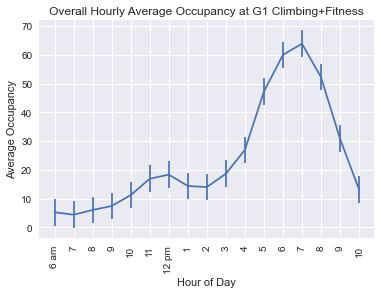

In [15]:
plt.errorbar(open_hours, all_hourly_means, all_hourly_sdom)
twelve_hours = ['6 am', 7, 8, 9, 10, 11, '12 pm', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.xticks(ticks = open_hours, labels = twelve_hours, rotation=90)
plt.xlabel('Hour of Day')
plt.ylabel('Average Occupancy')
plt.title('Overall Hourly Average Occupancy at G1 Climbing+Fitness')
plt.savefig('overall_hourly_avg.pdf')

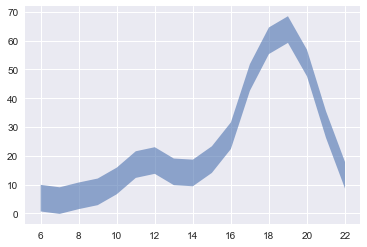

In [16]:
plt.fill_between(open_hours, all_hourly_means + all_hourly_sdom, all_hourly_means - all_hourly_sdom, alpha = 0.6)

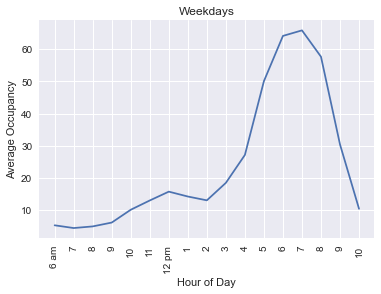

In [17]:
plt.plot(open_hours, week_hourly_means)
twelve_hours = ['6 am', 7, 8, 9, 10, 11, '12 pm', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.xticks(ticks = open_hours, labels = twelve_hours, rotation=90)
plt.xlabel('Hour of Day')
plt.ylabel('Average Occupancy')
plt.title('Weekdays')
plt.savefig('weekday_hourly_avg.pdf')

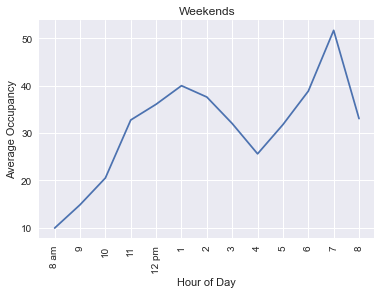

In [18]:
plt.plot(weekend_open_hours, weekend_hourly_means)
twelve_hours = ['8 am', 9, 10, 11, '12 pm', 1, 2, 3, 4, 5, 6, 7, 8]
plt.xticks(ticks = weekend_open_hours, labels = twelve_hours, rotation=90)
plt.xlabel('Hour of Day')
plt.ylabel('Average Occupancy')
plt.title('Weekends')
plt.savefig('weekend_hourly_avg.pdf')

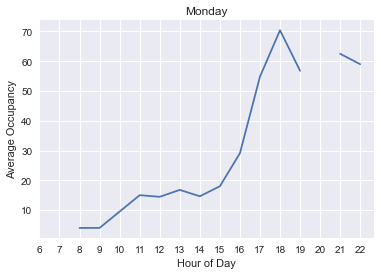

In [19]:
plt.plot(mon_open_hours, mon_hourly_means)
plt.xticks(ticks = mon_open_hours)
plt.xlabel('Hour of Day')
plt.ylabel('Average Occupancy')
plt.title('Monday')
plt.savefig('monday.pdf')

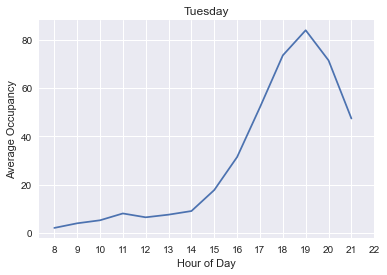

In [20]:
plt.plot(tue_open_hours, tue_hourly_means)
plt.xticks(ticks = tue_open_hours)
plt.xlabel('Hour of Day')
plt.ylabel('Average Occupancy')
plt.title('Tuesday')
plt.savefig('tuesday.pdf')

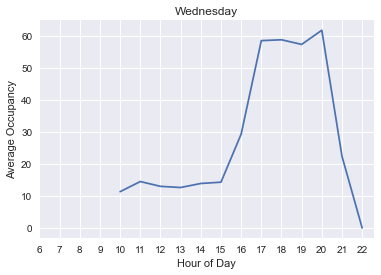

In [21]:
plt.plot(wed_open_hours, wed_hourly_means)
plt.xticks(ticks = wed_open_hours)
plt.xlabel('Hour of Day')
plt.ylabel('Average Occupancy')
plt.title('Wednesday')
plt.savefig('wednesday.pdf')

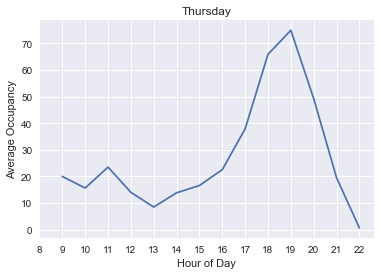

In [22]:
plt.plot(thu_open_hours, thu_hourly_means)
plt.xticks(ticks = thu_open_hours)
plt.xlabel('Hour of Day')
plt.ylabel('Average Occupancy')
plt.title('Thursday')
plt.savefig('thursday.pdf')

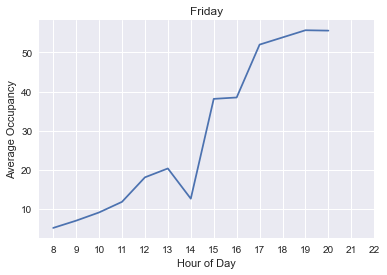

In [23]:
plt.plot(fri_open_hours, fri_hourly_means)
plt.xticks(ticks = fri_open_hours)
plt.xlabel('Hour of Day')
plt.ylabel('Average Occupancy')
plt.title('Friday')
plt.savefig('friday.pdf')

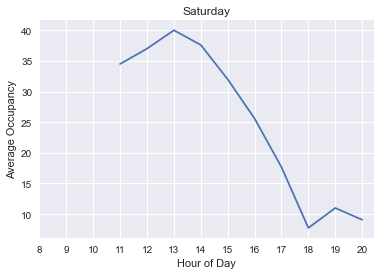

In [24]:
plt.plot(sat_open_hours, sat_hourly_means)
plt.xticks(ticks = sat_open_hours)
plt.xlabel('Hour of Day')
plt.ylabel('Average Occupancy')
plt.title('Saturday')
plt.savefig('saturday.pdf')

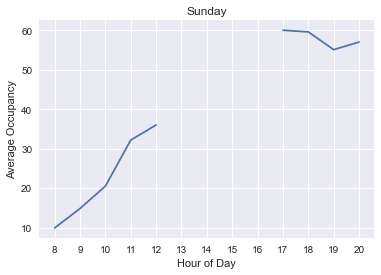

In [25]:
plt.plot(sun_open_hours, sun_hourly_means)
plt.xticks(ticks = sun_open_hours)
plt.xlabel('Hour of Day')
plt.ylabel('Average Occupancy')
plt.title('Sunday')
plt.savefig('sunday.pdf')